In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("D:/Swinburne/Sem 3/Innovation Project/Data Sciencne/fraudTest.csv")

In [3]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [4]:
#Display the data
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
#Sum the missing value
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
#Summary the description of the dataset
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


# Data Pre-processing

In [8]:
# Drop the first column
df.drop(df.columns[0], axis=1, inplace=True)

In [9]:
# Convert 'trans_date_trans_time'and 'dob' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [10]:
import datetime
# Extract the date and time components
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time

In [11]:
df['trans_date'] = pd.to_datetime(df['trans_date'])

In [12]:
# Format the datetime object as a string
df['trans_time'] = df['trans_date_trans_time'].dt.strftime('%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [13]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:25
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:15:15
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17


# EDA

In [14]:
#Distribute the class
df[('is_fraud')].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_13456\3018171374.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


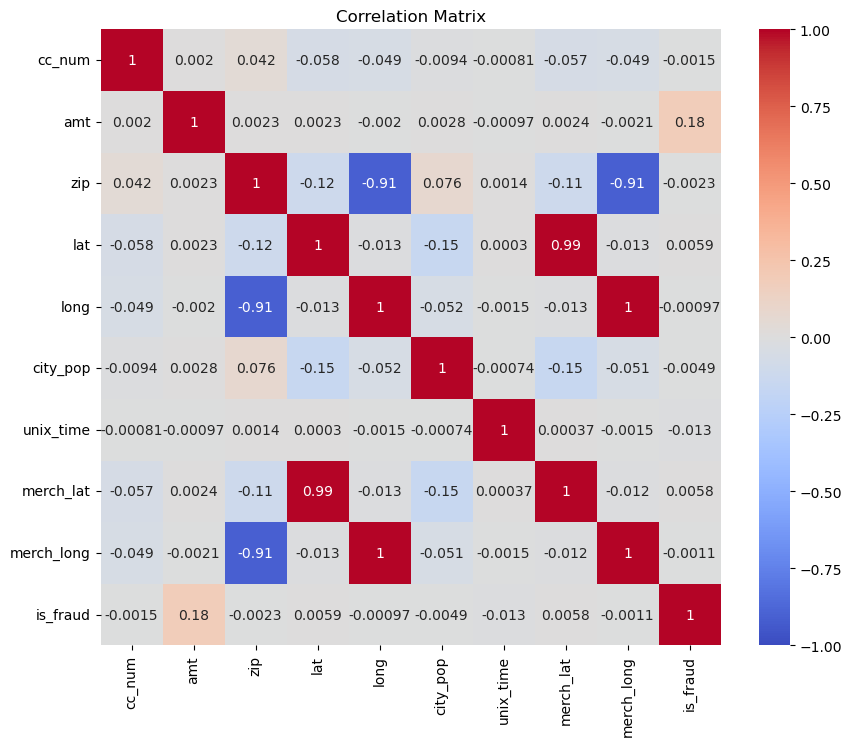

In [15]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

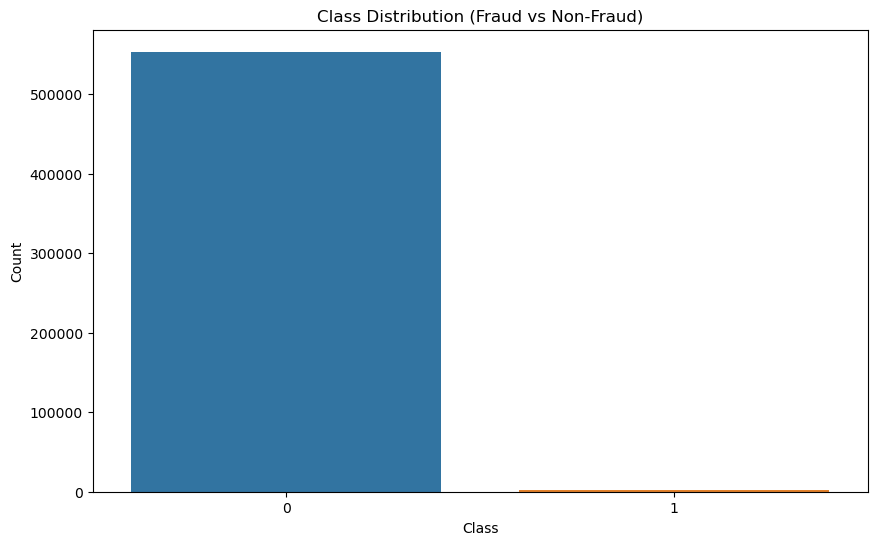

In [16]:
# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='is_fraud', data=df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [17]:
# Extract month and year from 'trans_date'
df['trans_month_year'] = df['trans_date'].dt.to_period('M')

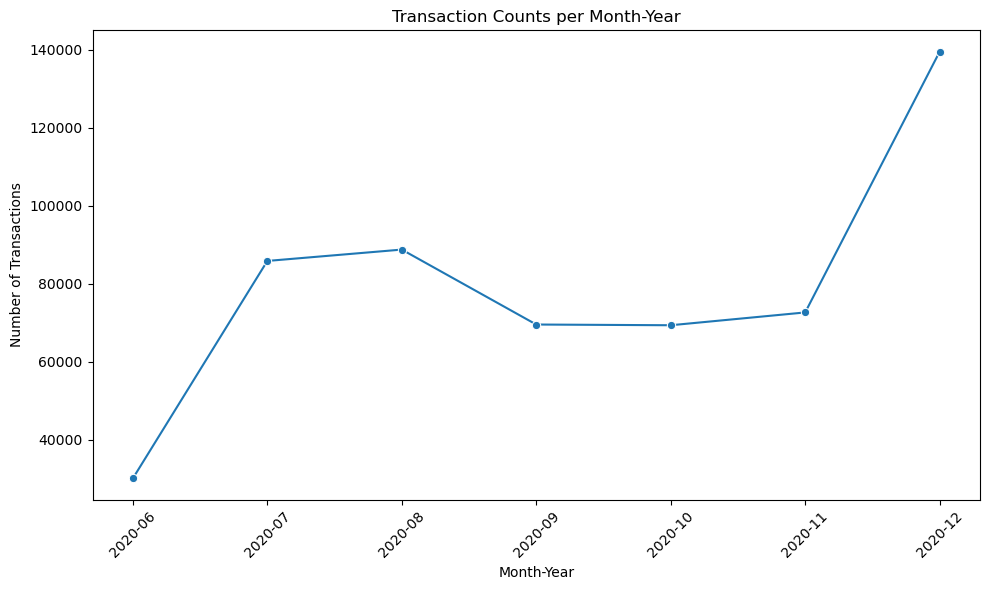

In [18]:
# EDA based on trans_month_year
# Example: Count of transactions per month and year
transaction_counts = df['trans_month_year'].value_counts().sort_index()

# Plotting transaction counts over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=transaction_counts.index.astype(str), y=transaction_counts.values, marker='o')
plt.xticks(rotation=45)
plt.title('Transaction Counts per Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

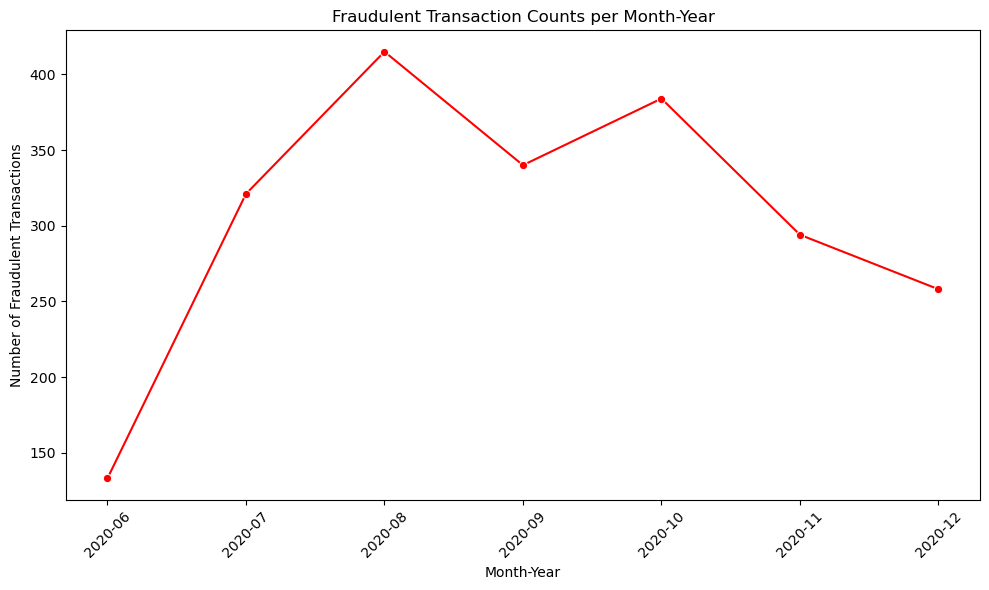

In [19]:
# EDA based on trans_month_year for fraudulent transactions
# Example: Count of fraudulent transactions per month and year
fraud_transaction_counts = df[df['is_fraud'] == 1]['trans_month_year'].value_counts().sort_index()

# Plotting fraudulent transaction counts over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=fraud_transaction_counts.index.astype(str), y=fraud_transaction_counts.values, marker='o', color='red')
plt.xticks(rotation=45)
plt.title('Fraudulent Transaction Counts per Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Fraudulent Transactions')
plt.tight_layout()
plt.show()

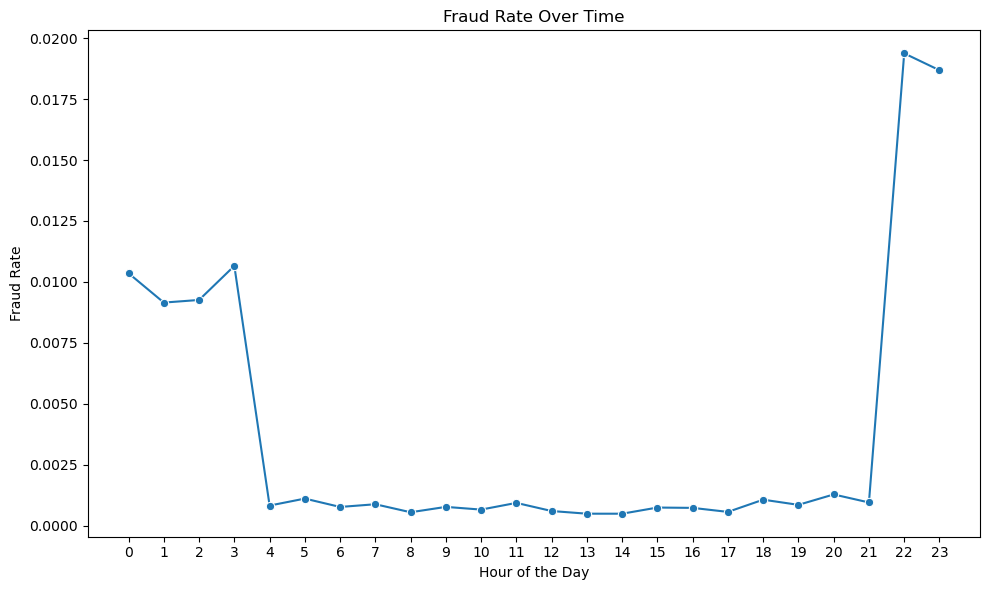

In [20]:
# Assuming 'is_fraud' column exists
fraud_by_hour = df.groupby(df['trans_date_trans_time'].dt.hour)['is_fraud'].mean()

# Plotting fraud analysis by time
plt.figure(figsize=(10, 6))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o')
plt.title('Fraud Rate Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Fraud Rate')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

In [21]:
# Create new features: 'transaction_hour', 'transaction_day', 'transaction_month', 'age'
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

# Outliers Handling

In [22]:
# Calculate quartiles
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]


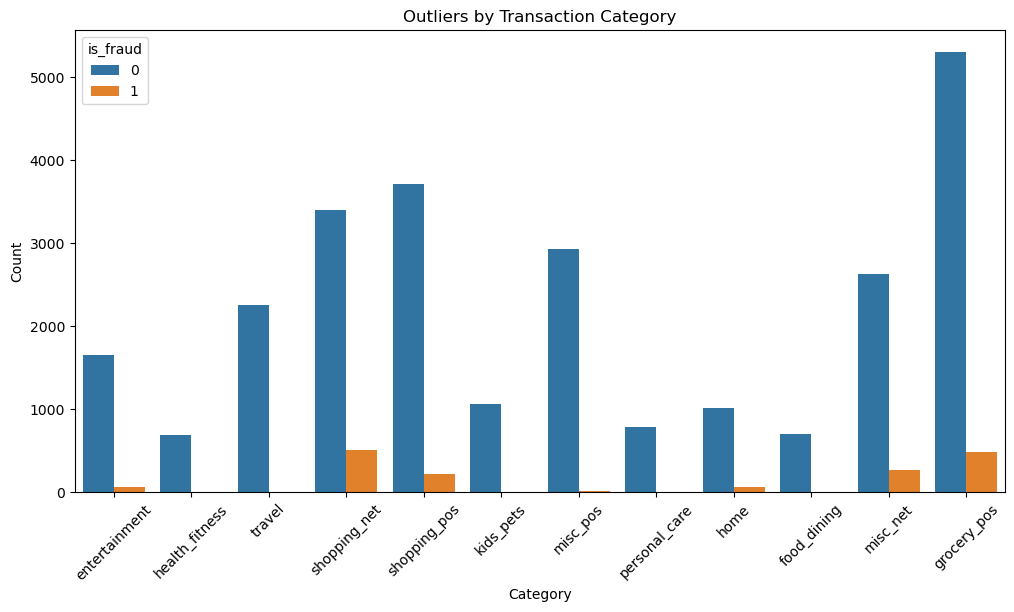

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=outliers)
plt.title('Outliers by Transaction Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

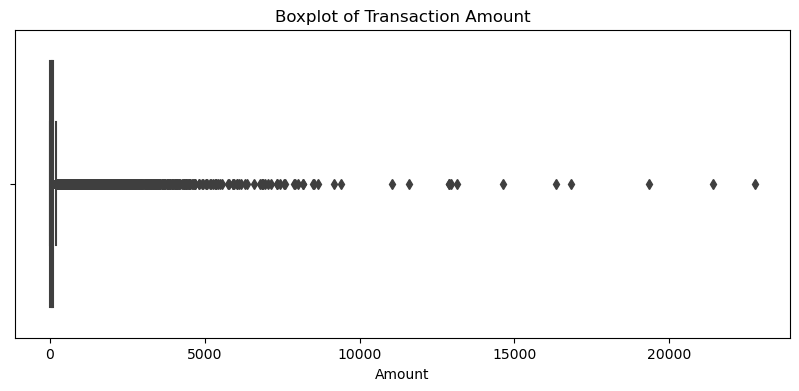

In [24]:
# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x='amt', data=df)
plt.title('Boxplot of Transaction Amount')
plt.xlabel('Amount')
plt.show()

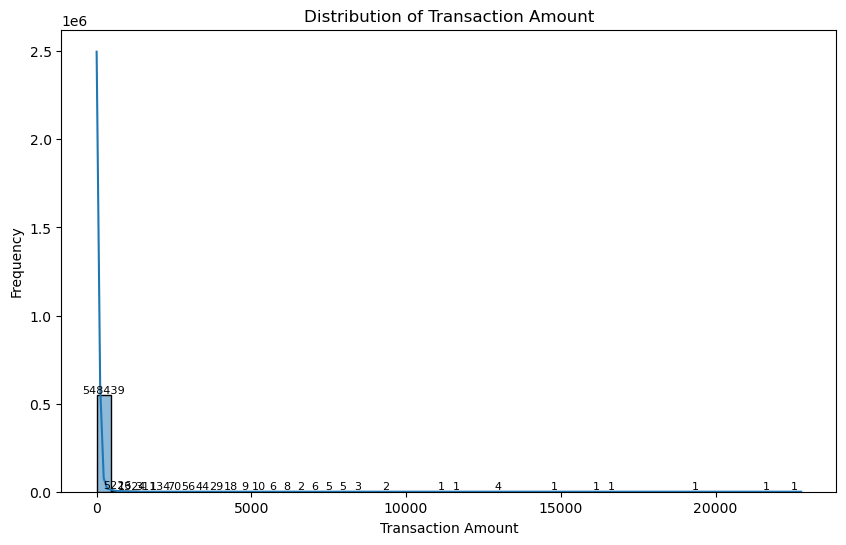

In [25]:
# Distribution of transaction amount
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Adding data annotations
counts, bins = np.histogram(df['amt'], bins=50)
for count, bin_edge in zip(counts, bins):
    if count > 0:  # Only annotate bins with non-zero counts
        plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, str(count), ha='center', va='bottom', fontsize=8)

plt.show()

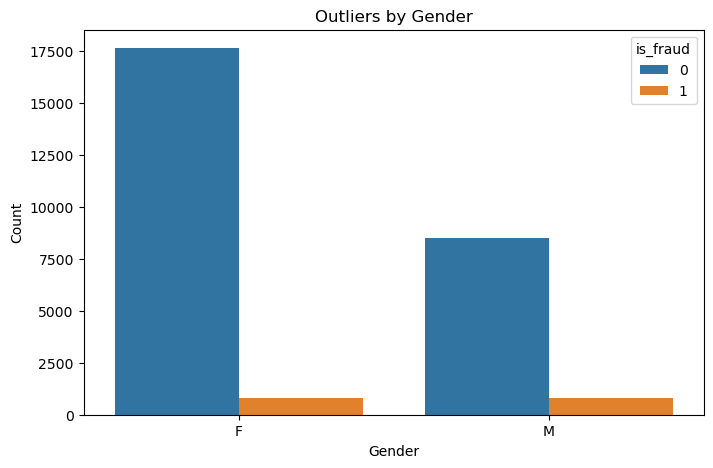

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='is_fraud', data=outliers)
plt.title('Outliers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [27]:
# Assuming 'outliers' DataFrame contains your identified outliers
# Calculate the total number of outliers
total_outliers = outliers.shape[0]

# Calculate the number of outliers that are fraud cases
fraud_outliers = outliers[outliers['is_fraud'] == 1].shape[0]

# Calculate the percentage of outliers that are fraud cases
percentage_fraud_outliers = (fraud_outliers / total_outliers) * 100

print(f"Total number of outliers: {total_outliers}")
print(f"Number of fraud cases among outliers: {fraud_outliers}")
print(f"Percentage of outliers that are fraud cases: {percentage_fraud_outliers:.2f}%")

Total number of outliers: 27778
Number of fraud cases among outliers: 1613
Percentage of outliers that are fraud cases: 5.81%


Text(0, 0.5, 'Count')

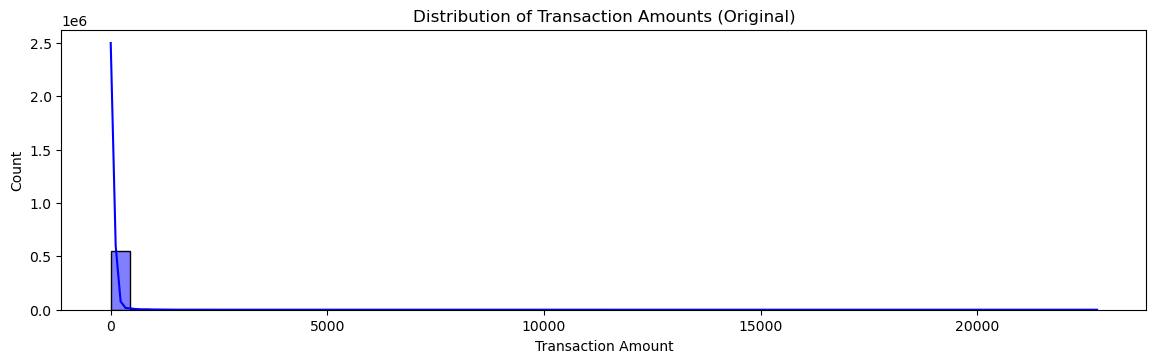

In [28]:
# Step 1: Evaluate Outlier Impact
plt.figure(figsize=(14, 8))

# Plot original distribution
plt.subplot(2, 1, 1)
sns.histplot(df['amt'], kde=True, bins=50, color='blue')
plt.title('Distribution of Transaction Amounts (Original)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

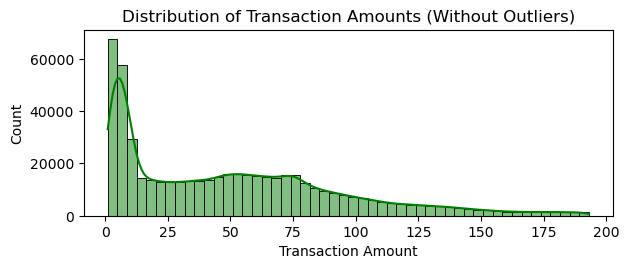

In [29]:
# Plot distribution without outliers
plt.subplot(2, 1, 2)
sns.histplot(df[~df.index.isin(outliers.index)]['amt'], kde=True, bins=50, color='green')
plt.title('Distribution of Transaction Amounts (Without Outliers)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

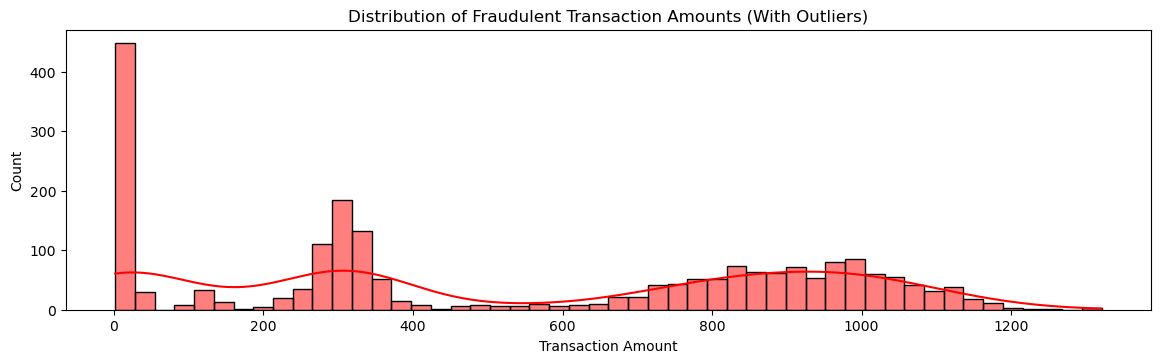

In [30]:
# Step 2: Consider Analysis Goals
# Example: If fraud detection is the goal, visualize fraudulent transactions with and without outliers
plt.figure(figsize=(14, 8))

# Plot fraudulent transactions with outliers
plt.subplot(2, 1, 1)
sns.histplot(df[df['is_fraud'] == 1]['amt'], kde=True, bins=50, color='red')
plt.title('Distribution of Fraudulent Transaction Amounts (With Outliers)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

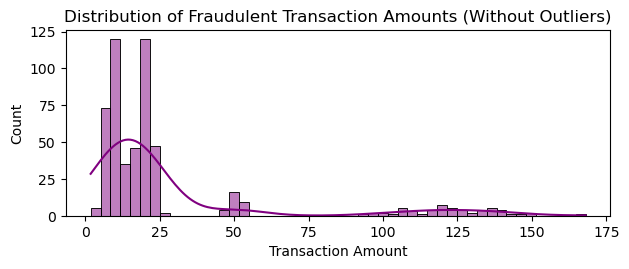

In [31]:
# Plot fraudulent transactions without outliers
plt.subplot(2, 1, 2)
sns.histplot(df[(df['is_fraud'] == 1) & (~df.index.isin(outliers.index))]['amt'], kde=True, bins=50, color='purple')
plt.title('Distribution of Fraudulent Transaction Amounts (Without Outliers)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Undersampling

In [32]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df[df['is_fraud'] == 0]
df_minority = df[df['is_fraud'] == 1]

In [33]:
# Downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority), # to match minority class
                                   random_state=42) # reproducible results

In [34]:
# Combine minority class with downsampled majority class
df_undersampled = pd.concat([df_majority_downsampled, df_minority])

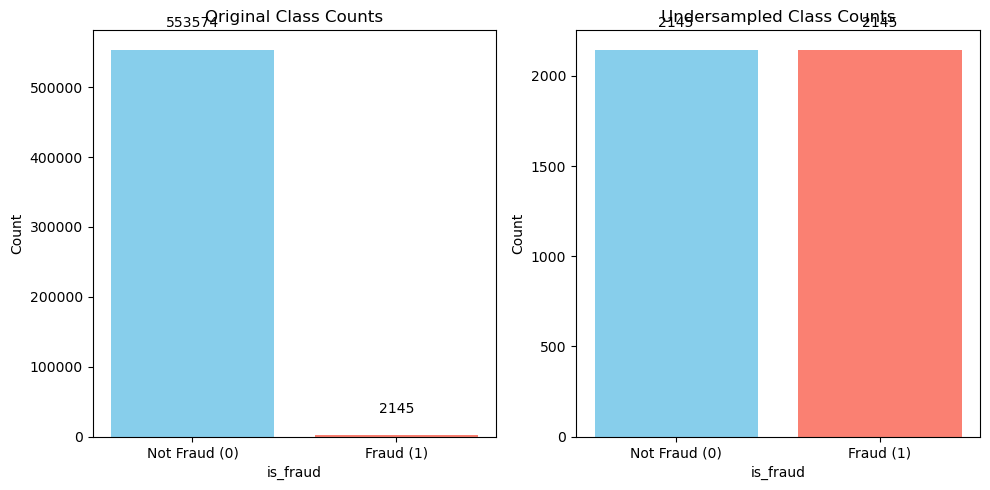

In [35]:
# Get class counts
original_counts = df['is_fraud'].value_counts()
undersampled_counts = df_undersampled['is_fraud'].value_counts()

# Plotting with labels
plt.figure(figsize=(10, 5))

# Plot for original class counts
plt.subplot(1, 2, 1)
bars = plt.bar(original_counts.index, original_counts.values, color=['skyblue', 'salmon'])
plt.title('Original Class Counts')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks(original_counts.index, ['Not Fraud (0)', 'Fraud (1)'])
for bar, count in zip(bars, original_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05 * max(original_counts.values),
             f'{count}', ha='center', va='bottom')

# Plot for undersampled class counts
plt.subplot(1, 2, 2)
bars = plt.bar(undersampled_counts.index, undersampled_counts.values, color=['skyblue', 'salmon'])
plt.title('Undersampled Class Counts')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks(undersampled_counts.index, ['Not Fraud (0)', 'Fraud (1)'])
for bar, count in zip(bars, undersampled_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05 * max(undersampled_counts.values),
             f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [36]:
# Example: Count of transactions per month and year after undersampling
transaction_counts_undersampled = df_undersampled['trans_month_year'].value_counts().sort_index()

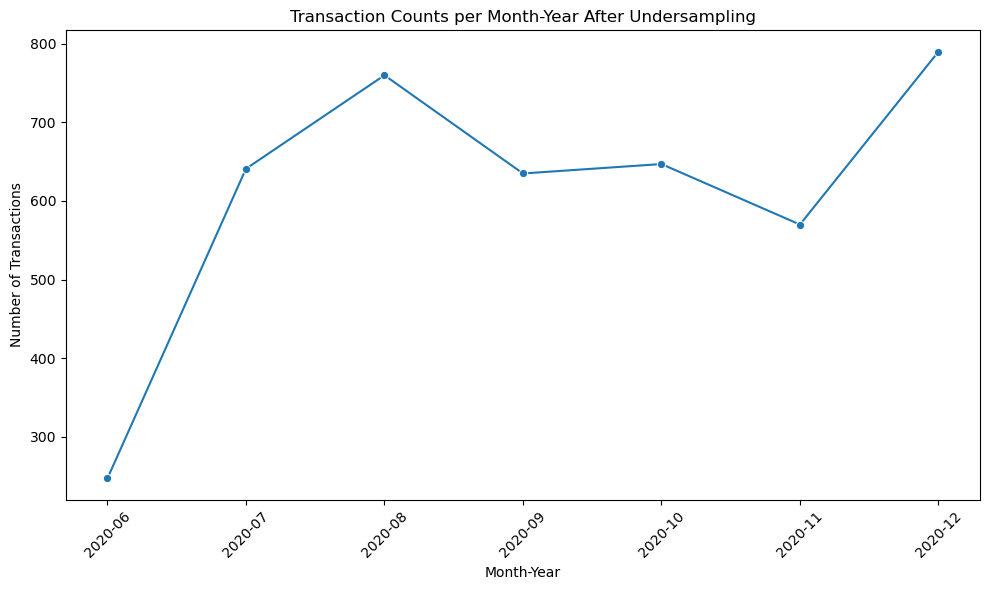

In [37]:
# Plotting transaction counts over time after undersampling
plt.figure(figsize=(10, 6))
sns.lineplot(x=transaction_counts_undersampled.index.astype(str), y=transaction_counts_undersampled.values, marker='o')
plt.xticks(rotation=45)
plt.title('Transaction Counts per Month-Year After Undersampling')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

In [38]:
# Plotting fraudulent transaction counts over time after undersampling
fraud_transaction_counts_undersampled = df_undersampled[df_undersampled['is_fraud'] == 1]['trans_month_year'].value_counts().sort_index()

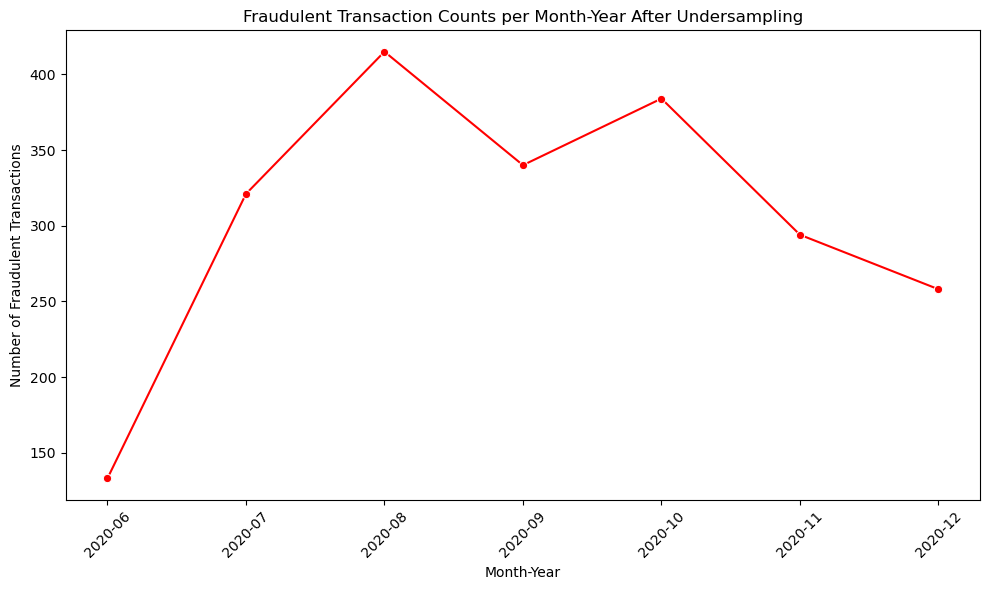

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=fraud_transaction_counts_undersampled.index.astype(str), y=fraud_transaction_counts_undersampled.values, marker='o', color='red')
plt.xticks(rotation=45)
plt.title('Fraudulent Transaction Counts per Month-Year After Undersampling')
plt.xlabel('Month-Year')
plt.ylabel('Number of Fraudulent Transactions')
plt.tight_layout()
plt.show()

In [40]:
# Example: Creating new features based on transaction amounts
df_undersampled['amount_log'] = np.log(df_undersampled['amt'] + 1)

# Feature Engineering

# 1. Transaction Frequency Features

In [41]:
#Statistic summary of total transaction per user
df_undersampled['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])

mean       5.396226
median     3.000000
min        1.000000
max       26.000000
Name: cc_num, dtype: float64

## 1.1 Calculate total transactions per day per user

In [42]:
# Calculate total transactions of each user per day
df_undersampled['transactions_per_day'] = df_undersampled.groupby(['cc_num', df_undersampled['trans_date'].dt.date])['trans_date'].transform('count')

print(df_undersampled[['cc_num', 'trans_date', 'transactions_per_day']].head())

                  cc_num trans_date  transactions_per_day
547885   371226440126102 2020-12-29                     1
528140  6596735789587928 2020-12-26                     1
129300    30551643947183 2020-08-04                     1
354681  6011388901471808 2020-11-05                     1
182576  6011348830550197 2020-08-24                     1


## 1.2 Calculate total transactions per week per user

In [43]:
# Create a 'Week' column using ISO calendar weeks
df_undersampled['Week'] = df_undersampled['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
df_undersampled['transactions_per_week'] = df_undersampled.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated dataframe with Week and total transactions per Week each customer columns
print(df_undersampled[['cc_num', 'Week', 'transactions_per_week']].head())

                  cc_num  Week  transactions_per_week
547885   371226440126102    53                      1
528140  6596735789587928    52                      1
129300    30551643947183    32                      2
354681  6011388901471808    45                      1
182576  6011348830550197    35                      1


## 1.3 Calculate total transactions per month per user

In [44]:
# Calculate total transactions per user per month
df_undersampled['transactions_per_month'] = df_undersampled.groupby(['cc_num', df_undersampled['trans_date'].dt.month])['trans_date'].transform('count')
print(df_undersampled[['cc_num','transactions_per_month']].head())

                  cc_num  transactions_per_month
547885   371226440126102                       1
528140  6596735789587928                       1
129300    30551643947183                       3
354681  6011388901471808                       2
182576  6011348830550197                       2


## 1.4 Calculate total transactions per season per user

In [45]:
#Transaction per season of all users
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'
df_undersampled['transactions_per_season'] = df_undersampled.groupby(['cc_num', df_undersampled['trans_date'].apply(season)])['trans_date'].transform('count')

## 1.5 Calculate total transactions in the last 7 days per user


In [46]:
# Get the maximum date in the dataset to define the last 7 days
#max_date = df_undersampled['trans_date'].max()

# Filter the dataset for transactions in the last 7 days
# last_7_days_df_undersampled = df_undersampled[df_undersampled['trans_date'] >= max_date - pd.Timedelta(days=7)]

# Calculate total transactions per user in the last 7 days
#transactions_last_7_days = last_7_days_df_undersampled.groupby('cc_num').size().reset_index(name='transactions_last_7_days')

# Merge total transactions back into the original dataset
#df_undersampled = pd.merge(df_undersampled, transactions_last_7_days, on='cc_num', how='left')
#print(df_undersampled[['cc_num','transactions_last_7_days']].head())

# 2. User Transaction Behavior


## 2.1 Calculate total, average, median and standard deviation of all transactions made by users


In [47]:
## Perform the aggregations
agg_df_undersampled = df_undersampled.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
).reset_index()

# Merge the aggregation results back to the original DataFrame
#df_undersampled = df_undersampled.merge(agg_df_undersampled, on='cc_num', how='left')

# 3. User-Based Features


## 3.1 Create "Age" Function to calculate Customer's Age


In [48]:
#Explore age stat
df_undersampled['age'].agg(['mean', 'median', 'min', 'max'])

mean      47.534965
median    46.000000
min       15.000000
max       95.000000
Name: age, dtype: float64

## 3.2 Convert Gender into Binary Values


In [49]:
#Convert gender to binary values
print('\n The number of cutomers based on age is:')
print(df_undersampled['gender'].value_counts())
print("-" * 40)

#Total transaction amount by gender
print('\nTotal transaction amount made by gender is:')
print(df_undersampled.groupby('gender')['amt'].sum())
print("-" * 40)

#Average transaction made by gender
print('\n Average transaction amount made by gender is:')
print(df_undersampled.groupby('gender')['amt'].mean())
print("-" * 40)

# Calculate mean and median of age distribution by gender
print('\n Age Distribution by gender is:')
print(df_undersampled.groupby('gender')['age'].agg(['mean', 'median']))
print("-" * 40)


 The number of cutomers based on age is:
F    2361
M    1929
Name: gender, dtype: int64
----------------------------------------

Total transaction amount made by gender is:
gender
F    631194.89
M    638401.85
Name: amt, dtype: float64
----------------------------------------

 Average transaction amount made by gender is:
gender
F    267.342181
M    330.949637
Name: amt, dtype: float64
----------------------------------------

 Age Distribution by gender is:
             mean  median
gender                   
F       47.415078    46.0
M       47.681700    46.0
----------------------------------------


## 3.3 Create feature "city_size" to categorize the city based on its population


In [50]:
# Categorize cities based on population size
df_undersampled['city_size_category'] = pd.cut(df_undersampled['city_pop'], bins=[0, 10000, 100000, float('inf')], labels=['Small', 'Medium', 'Large'])

# Display the updated DataFrame
print(df_undersampled[['city_pop', 'city_size_category']].head())

        city_pop city_size_category
547885      1810              Small
528140      5619              Small
129300      5621              Small
354681       427              Small
182576    493806              Large


## 4.1 Create feature "Fraud_ratio" to calculate the ratio of fraud transaction/total transactions made by each user

In [51]:
# Group by credit card number and sum up fraudulent transactions
fraud_transactions_per_user = df_undersampled.groupby('cc_num')['is_fraud'].sum().reset_index()

# Count total transactions per user
total_transactions_per_user = df_undersampled.groupby('cc_num').size().reset_index(name='total_transactions')

# Merge the two dataframes on credit card number
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')

# Calculate ratio of fraudulent transactions to total transactions
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['is_fraud'] / fraud_ratio_per_user['total_transactions']

# Add fraud_ratio as a new column in the original dataframe df_undersampled
df_undersampled = pd.merge(df_undersampled, fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')
df_undersampled

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,transaction_month,age,amount_log,transactions_per_day,Week,transactions_per_week,transactions_per_month,transactions_per_season,city_size_category,fraud_ratio
0,2020-12-29 19:17:03,371226440126102,"fraud_Medhurst, Cartwright and Ebert",personal_care,60.51,Stacy,Lambert,F,85430 Julie Trafficway Suite 792,Mulberry Grove,...,12,46,4.119200,1,53,1,1,1,Small,0.000000
1,2020-12-26 03:46:04,6596735789587928,fraud_Pouros-Haag,shopping_pos,2.36,Spencer,Williams,M,1145 Tony Drive Suite 080,Watertown,...,12,61,1.211941,1,52,1,1,1,Small,0.833333
2,2020-08-04 22:27:26,30551643947183,"fraud_Mante, Luettgen and Hackett",health_fitness,5.55,Morgan,Smith,F,1441 Bradley Place,Grover,...,8,46,1.879465,1,32,2,3,4,Small,0.545455
3,2020-11-05 11:29:52,6011388901471808,"fraud_Goldner, Kovacek and Abbott",grocery_pos,115.80,Jacqueline,Marsh,F,950 Sheryl Spurs,Dunlevy,...,11,69,4.760463,1,45,1,2,3,Small,0.000000
4,2020-08-24 12:08:18,6011348830550197,"fraud_Turner, Ziemann and Lehner",food_dining,8.30,Samuel,Johnston,M,16285 Jessica Lights,Birmingham,...,8,40,2.230014,1,35,1,2,4,Large,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,12,61,6.949387,7,52,10,10,10,Medium,1.000000
4286,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,12,61,6.767447,7,52,10,10,10,Medium,1.000000
4287,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,12,61,6.947380,7,52,10,10,10,Medium,1.000000
4288,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,12,61,5.670812,7,52,10,10,10,Medium,1.000000


# 5.Geographical Analysis

5.1 Distance calculation using Haversine calculation
This function the great-circle distance between two points on the Earth's surface given their latitude and longitude coordinates. This function can be applied to gain insights from a dataset that includes geographical information, such as the coordinates of customer locations and merchant locations.

- Are customers close to their preferred merchants?
- Customer segmentation (near, moderate, far)

In [52]:
# Create the Haversine function using transaction longitude and latitude, also using merchant's longitude and latitude
def haversine(lat1, lon1, lat2, lon2):
    # Distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # Convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # Apply formula
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

df_undersampled['distance_to_merch'] = df_undersampled.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

In [53]:
df_undersampled

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,age,amount_log,transactions_per_day,Week,transactions_per_week,transactions_per_month,transactions_per_season,city_size_category,fraud_ratio,distance_to_merch
0,2020-12-29 19:17:03,371226440126102,"fraud_Medhurst, Cartwright and Ebert",personal_care,60.51,Stacy,Lambert,F,85430 Julie Trafficway Suite 792,Mulberry Grove,...,46,4.119200,1,53,1,1,1,Small,0.000000,87.576312
1,2020-12-26 03:46:04,6596735789587928,fraud_Pouros-Haag,shopping_pos,2.36,Spencer,Williams,M,1145 Tony Drive Suite 080,Watertown,...,61,1.211941,1,52,1,1,1,Small,0.833333,50.162698
2,2020-08-04 22:27:26,30551643947183,"fraud_Mante, Luettgen and Hackett",health_fitness,5.55,Morgan,Smith,F,1441 Bradley Place,Grover,...,46,1.879465,1,32,2,3,4,Small,0.545455,53.567951
3,2020-11-05 11:29:52,6011388901471808,"fraud_Goldner, Kovacek and Abbott",grocery_pos,115.80,Jacqueline,Marsh,F,950 Sheryl Spurs,Dunlevy,...,69,4.760463,1,45,1,2,3,Small,0.000000,96.489713
4,2020-08-24 12:08:18,6011348830550197,"fraud_Turner, Ziemann and Lehner",food_dining,8.30,Samuel,Johnston,M,16285 Jessica Lights,Birmingham,...,40,2.230014,1,35,1,2,4,Large,0.000000,47.005203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,61,6.949387,7,52,10,10,10,Medium,1.000000,6.945705
4286,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,61,6.767447,7,52,10,10,10,Medium,1.000000,75.956505
4287,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,61,6.947380,7,52,10,10,10,Medium,1.000000,36.534673
4288,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,61,5.670812,7,52,10,10,10,Medium,1.000000,48.808449


In [54]:
# Calculate transaction frequency and average amount within the last 24 hours
df_undersampled = df_undersampled.sort_values(by=['cc_num', 'trans_date_trans_time'])
df_undersampled['trans_24h_count'] = df_undersampled.groupby('cc_num').apply(lambda x: x.rolling('24h', on='trans_date_trans_time').trans_date_trans_time.count()).reset_index(level=0, drop=True)
df_undersampled['trans_24h_amount_avg'] = df_undersampled.groupby('cc_num').apply(lambda x: x.rolling('24h', on='trans_date_trans_time').amt.mean()).reset_index(level=0, drop=True)

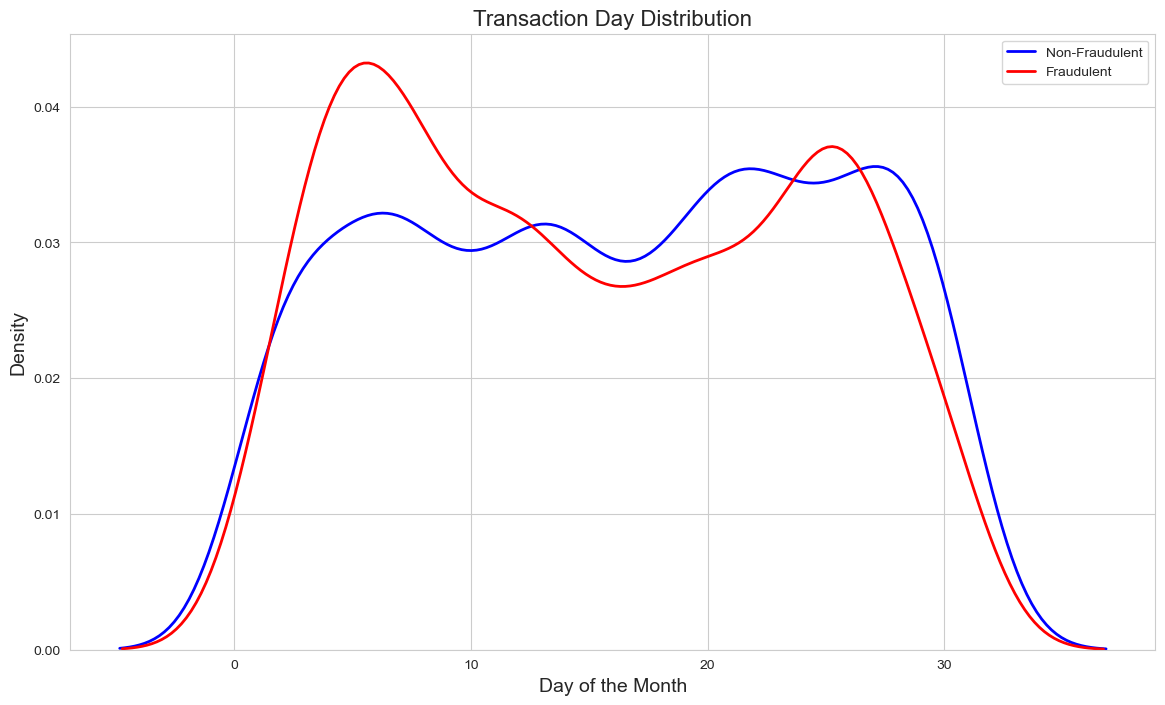

Correlation between transaction day and fraud: -0.06


In [55]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Improved Visualization: Transaction Day
plt.figure(figsize=(14, 8))

# Plot density plots
sns.kdeplot(df_undersampled[df_undersampled['is_fraud'] == 0]['transaction_day'], color='blue', label='Non-Fraudulent', lw=2)
sns.kdeplot(df_undersampled[df_undersampled['is_fraud'] == 1]['transaction_day'], color='red', label='Fraudulent', lw=2)

# Add title and labels
plt.title('Transaction Day Distribution', fontsize=16)
plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()

# Calculate correlation between transaction day and fraud
correlation = df_undersampled['transaction_day'].corr(df_undersampled['is_fraud'])

print(f"Correlation between transaction day and fraud: {correlation:.2f}")

Correlation between transaction amount and fraud: 0.63


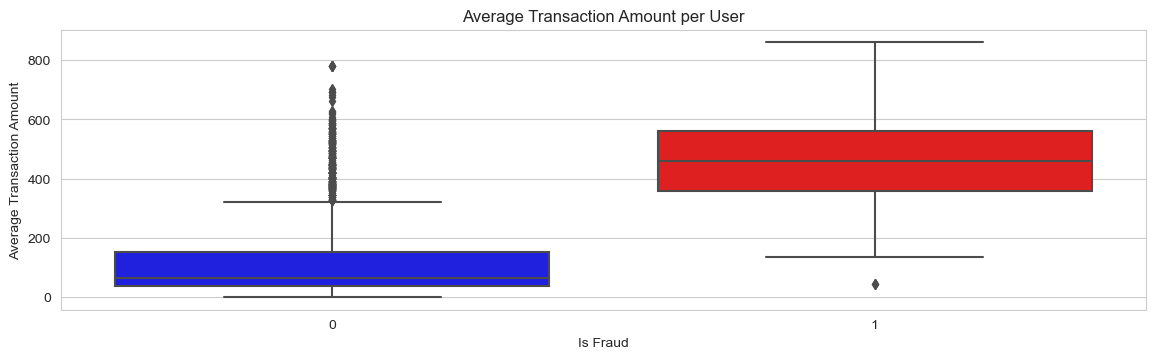

In [56]:
# Calculate the average and total transaction amount per user
df_undersampled['avg_trans_amount'] = df_undersampled.groupby('cc_num')['amt'].transform('mean')
df_undersampled['total_trans_amount'] = df_undersampled.groupby('cc_num')['amt'].transform('sum')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualization: Average Transaction Amount per User
plt.figure(figsize=(14, 8))

# Boxplot
plt.subplot(2, 1, 1)
sns.boxplot(x='is_fraud', y='avg_trans_amount', data=df_undersampled, palette={0: 'blue', 1: 'red'})
plt.title('Average Transaction Amount per User')
plt.xlabel('Is Fraud')
plt.ylabel('Average Transaction Amount')

# Calculate correlation between transaction amount ('amt') and fraud ('is_fraud')
correlation = df_undersampled['amt'].corr(df_undersampled['is_fraud'])

print(f"Correlation between transaction amount and fraud: {correlation:.2f}")

In [57]:
# Define age groups (you can adjust these as per your specific age ranges)
bins = [0, 20, 30, 40, 50, 60, 100]  # Define your age bins here
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']  # Labels for age groups

# Assign age groups based on 'age' column
df_undersampled['age_group'] = pd.cut(df_undersampled['age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate correlation between age group and fraud
age_group_corr = df_undersampled.groupby('age_group')['is_fraud'].mean()

print("Correlation between age group and fraud:")
print(age_group_corr)

Correlation between age group and fraud:
age_group
0-20     0.307692
21-30    0.488000
31-40    0.495268
41-50    0.414474
51-60    0.568214
61+      0.546578
Name: is_fraud, dtype: float64


In [58]:
df_undersampled.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,transactions_per_month,transactions_per_season,city_size_category,fraud_ratio,distance_to_merch,trans_24h_count,trans_24h_amount_avg,avg_trans_amount,total_trans_amount,age_group
69,2020-06-23 12:28:54,60416207185,fraud_Leffler-Goldner,personal_care,148.02,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1,1,Small,0.000000,38.311273,1.0,148.02,125.390000,250.78,31-40
956,2020-12-01 13:38:21,60416207185,"fraud_Cole, Hills and Jewess",home,102.76,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1,1,Small,0.000000,109.165355,1.0,102.76,125.390000,250.78,31-40
1916,2020-07-29 01:52:55,60422928733,fraud_Skiles-Ankunding,grocery_net,86.65,Jeffrey,Powers,M,38352 Parrish Road Apt. 652,North Augusta,...,1,1,Medium,0.000000,9.008627,1.0,86.65,86.650000,86.65,61+
552,2020-09-09 19:48:11,60427851591,fraud_Torphy-Kertzmann,health_fitness,75.45,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,...,1,1,Small,0.000000,82.927666,1.0,75.45,75.450000,75.45,41-50
3226,2020-09-22 01:11:51,60487002085,"fraud_Moen, Reinger and Murphy",grocery_pos,337.39,David,White,M,66234 Hall Lock Suite 758,Jackson,...,8,8,Large,0.888889,117.241834,1.0,337.39,624.497778,5620.48,41-50


In [59]:
# Calculate correlation matrix
corr_matrix = df.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13456\3691153085.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


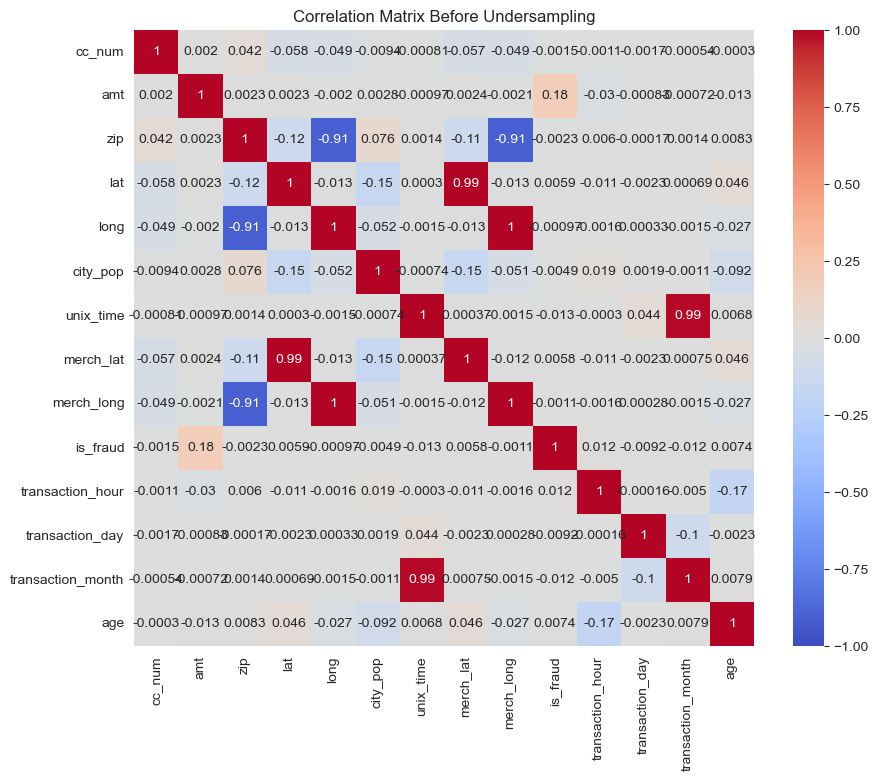

In [60]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Before Undersampling')
plt.show()

In [61]:
# Calculate correlation matrix
corr_matrix = df_undersampled.corr()
corr_matrix

C:\Users\DELL\AppData\Local\Temp\ipykernel_13456\1104040248.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_undersampled.corr()


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,Week,transactions_per_week,transactions_per_month,transactions_per_season,fraud_ratio,distance_to_merch,trans_24h_count,trans_24h_amount_avg,avg_trans_amount,total_trans_amount
cc_num,1.000000,-0.044549,0.009590,-0.083874,-0.038301,-0.028663,-0.062642,-0.083358,-0.038754,-0.009507,...,-0.061905,0.023172,0.021794,0.016083,-0.011473,-0.000883,0.016055,-0.033481,-0.073776,-0.044754
amt,-0.044549,1.000000,-0.022828,0.045601,0.002398,-0.007115,-0.058121,0.046788,0.002559,0.629667,...,-0.061467,0.539898,0.527533,0.463365,0.531769,-0.009781,0.468638,0.793341,0.603837,0.536881
zip,0.009590,-0.022828,1.000000,-0.073478,-0.908679,0.061875,0.034358,-0.074691,-0.907730,-0.012765,...,0.034178,-0.026454,-0.033005,-0.036823,-0.015405,0.026512,-0.019492,-0.029333,-0.037805,-0.051361
lat,-0.083874,0.045601,-0.073478,1.000000,-0.048051,-0.096632,0.035728,0.993518,-0.047419,0.040209,...,0.032988,0.049374,0.056613,0.072017,0.048524,-0.072173,0.046307,0.044215,0.075519,0.104473
long,-0.038301,0.002398,-0.908679,-0.048051,1.000000,-0.052290,-0.040356,-0.045455,0.999140,-0.013104,...,-0.040047,-0.016814,-0.006510,-0.002961,-0.015814,-0.012280,-0.007325,0.009329,0.003972,0.009110
city_pop,-0.028663,-0.007115,0.061875,-0.096632,-0.052290,1.000000,0.022082,-0.100583,-0.052744,-0.037423,...,0.022620,-0.033200,-0.025517,-0.056153,-0.045162,0.026898,-0.026646,-0.024153,-0.011782,-0.040294
unix_time,-0.062642,-0.058121,0.034358,0.035728,-0.040356,0.022082,1.000000,0.035198,-0.040912,-0.109432,...,0.999262,-0.095060,-0.075469,-0.067618,-0.066592,0.024594,-0.070691,-0.077529,-0.048033,-0.051938
merch_lat,-0.083358,0.046788,-0.074691,0.993518,-0.045455,-0.100583,0.035198,1.000000,-0.044891,0.041039,...,0.032517,0.049333,0.057778,0.072575,0.050109,-0.073851,0.046353,0.045029,0.076133,0.105503
merch_long,-0.038754,0.002559,-0.907730,-0.047419,0.999140,-0.052744,-0.040912,-0.044891,1.000000,-0.013954,...,-0.040630,-0.017713,-0.007369,-0.004057,-0.017048,-0.012335,-0.007968,0.008903,0.003334,0.008270
is_fraud,-0.009507,0.629667,-0.012765,0.040209,-0.013104,-0.037423,-0.109432,0.041039,-0.013954,1.000000,...,-0.112859,0.880808,0.861728,0.766581,0.828636,0.005193,0.721612,0.775513,0.729737,0.698873


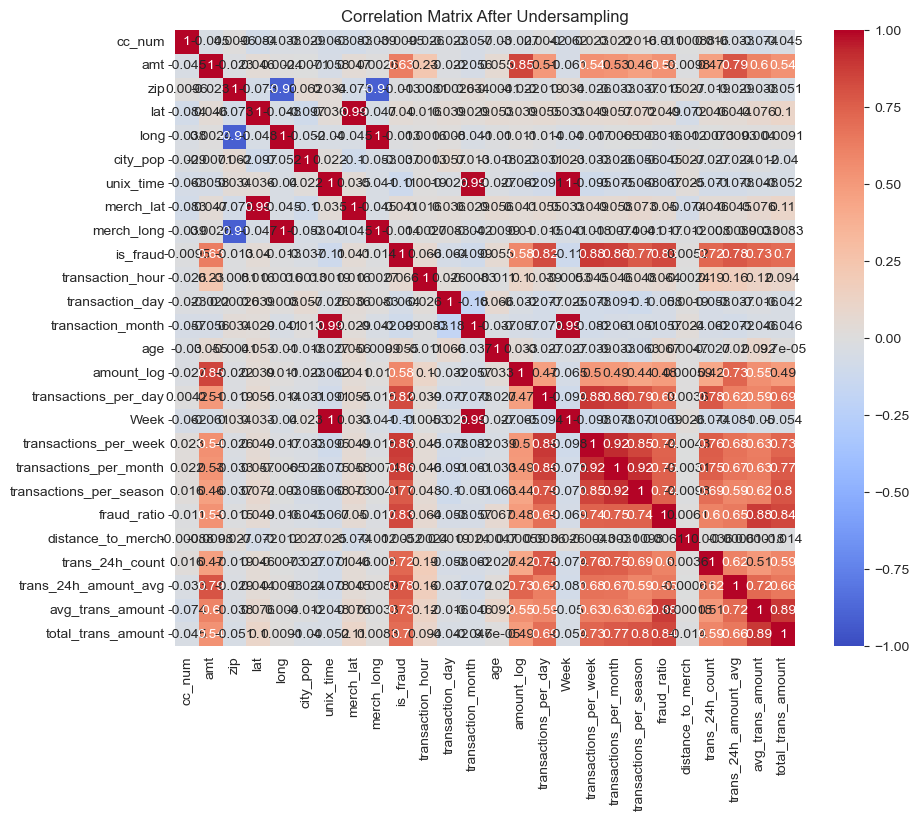

In [62]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix After Undersampling')
plt.show()

Based on the correlation matrix provided, here are the columns with notable positive and negative correlations to the target variable `is_fraud`:

### Positive Correlations with `is_fraud`:
1. `amt`: 0.629667
2. `avg_trans_amount`: 0.729737
3. `total_trans_amount`: 0.698873
4. `med_trans_amount`: 0.576848
5. `std_trans_amount`: 0.729121
6. `trans_24h_count`: 0.721612
7. `trans_24h_amount_avg`: 0.775513
8. `fraud_ratio`: 0.828636

### Negative Correlations with `is_fraud`:
1. `state`: -0.055989
2. `last`: -0.024149
3. `first`: -0.008557
4. `cc_num`: -0.009507

Correlation Matrix for distance_to_merch and is_fraud:
distance_to_merch: 0.005193

In [63]:
# List of features to plot
features = ['amt', 'trans_24h_count', 'trans_24h_amount_avg', 'amount_log', 'total_trans_amount']

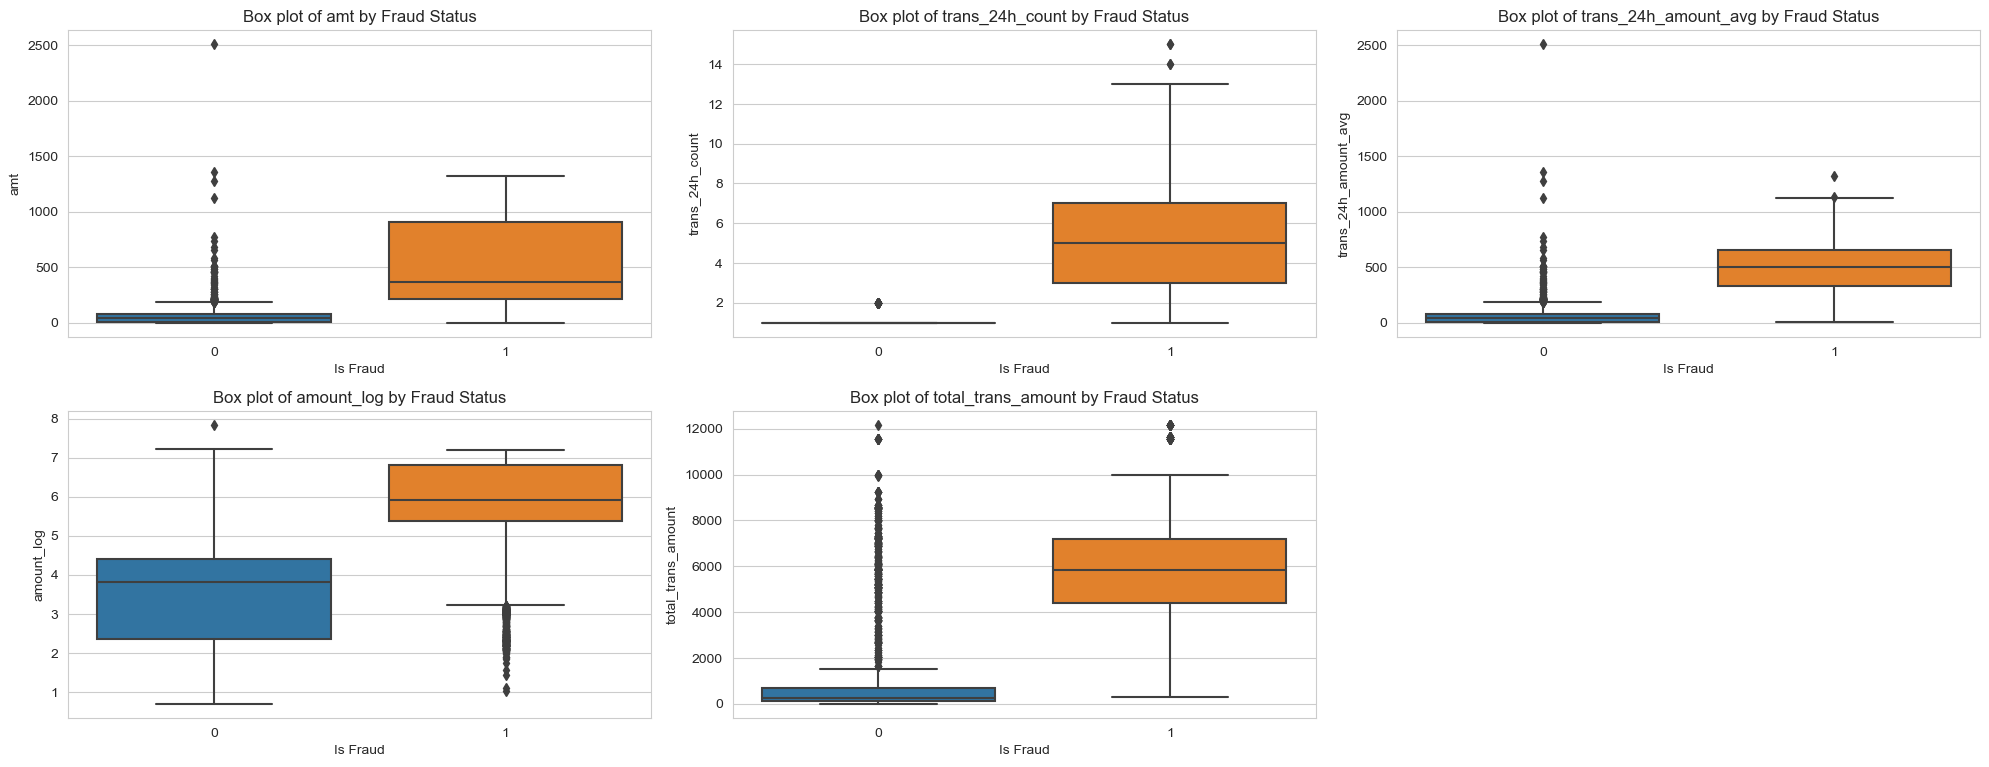

In [64]:
# Create box plots for each feature against the target class 'is_fraud'
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='is_fraud', y=feature, data=df_undersampled)
    plt.title(f'Box plot of {feature} by Fraud Status')
    plt.xlabel('Is Fraud')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Feature Engineering

In [85]:
df_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4290 entries, 69 to 2019
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trans_date_trans_time    4290 non-null   datetime64[ns]
 1   cc_num                   4290 non-null   int64         
 2   merchant                 4290 non-null   int32         
 3   category                 4290 non-null   int32         
 4   amt                      4290 non-null   float64       
 5   first                    4290 non-null   int32         
 6   last                     4290 non-null   int32         
 7   gender                   4290 non-null   int32         
 8   street                   4290 non-null   int32         
 9   city                     4290 non-null   int32         
 10  state                    4290 non-null   int32         
 11  zip                      4290 non-null   int64         
 12  lat                      4290 non

In [66]:
from sklearn.preprocessing import LabelEncoder

# Encode remaining categorical variables if any are left
# For example, using LabelEncoder
encoder = LabelEncoder()
for col in df_undersampled.select_dtypes(include=['object', 'category']):
    df_undersampled[col] = encoder.fit_transform(df_undersampled[col])

In [67]:
# Split into features and target variable
X = df_undersampled.drop('is_fraud', axis=1)
y = df_undersampled['is_fraud']

In [68]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the relevant features and target variable
# List of features to plot
features = ['amt', 'trans_24h_count', 'trans_24h_amount_avg', 'amount_log', 'total_trans_amount']

from sklearn.preprocessing import LabelEncoder

# Encode remaining categorical variables if any are left
# For example, using LabelEncoder
encoder = LabelEncoder()
for col in df_undersampled.select_dtypes(include=['object', 'category']):
    df_undersampled[col] = encoder.fit_transform(df_undersampled[col])

In [103]:
# Split into features and target variable
X = df_undersampled.drop('is_fraud', axis=1)
y = df_undersampled['is_fraud']

In [104]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest classifier for feature importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

TypeError: Cannot cast DatetimeArray to dtype float32

In [ ]:
# Print the importance score for 'distance_to_merch'
distance_to_merch_importance = feature_importances[feature_importances['Feature'] == 'distance_to_merch']
print(distance_to_merch_importance)

In [ ]:
print(feature_importances)


In [ ]:
df_undersampled.info()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest classifier for feature importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

In [ ]:
# Feature importance scores
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

In [ ]:
# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

In [ ]:
# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:")
print(feature_importance_df)

In [ ]:
# Select top features based on importance score threshold or select manually
# For example, selecting top 10 features
selected_features = feature_importance_df.head(10)['Feature'].tolist()

In [ ]:
# Filter X_train and X_test to include only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
# Train a model (e.g., Random Forest) on the selected features
model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
model_selected.fit(X_train_selected, y_train)

In [ ]:
from sklearn.metrics import classification_report

# Predictions and evaluation
y_pred = model_selected.predict(X_test_selected)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Random Forest classifier for feature importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)